In [1]:
# importamos librerías
import warnings
warnings.filterwarnings("ignore")
import numpy as np # librería para poder usar arreglos
import pandas as pd # librería para poder usad DataFrames (tablas)
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [9]:
def get_data():
    """
    Function to get the data
    """

    dataSet = pd.read_csv("cinema_hall_ticket_sales.csv", header=0)

    return dataSet

def infoData(dataSet):
    """
    Function to get general information about the data
    """

    print(dataSet.head())
    print("")
    print(dataSet.info())
    print("")
    print(dataSet.isnull().sum())
    print("")

def pre_process(dataSet):
    """
    Function to pre process the data
    """

    dataSet["Movie_Genre"] = [ 5 if x =='Action' else x for x in dataSet["Movie_Genre"]]
    dataSet["Movie_Genre"] = [ 4 if x =='Comedy' else x for x in dataSet["Movie_Genre"]]
    dataSet["Movie_Genre"] = [ 3 if x =='Drama' else x for x in dataSet["Movie_Genre"]]
    dataSet["Movie_Genre"] = [ 2 if x =='Horror' else x for x in dataSet["Movie_Genre"]]
    dataSet["Movie_Genre"] = [ 1 if x =='Sci-Fi' else x for x in dataSet["Movie_Genre"]]
    dataSet["Seat_Type"] = [ 2 if x =='Standard' else 1 for x in dataSet["Seat_Type"]]
    dataSet["Number_of_Person"] = [ 1 if x =='Alone' else int(x) for x in dataSet["Number_of_Person"]]
    dataSet["Purchase_Again"] = [ 1 if x =='Yes' else 0 for x in dataSet["Purchase_Again"]]

    return dataSet

In [112]:
data = get_data()
infoData(data)
preprocessData = pre_process(data)

  Ticket_ID  Age  Ticket_Price Movie_Genre Seat_Type Number_of_Person  \
0     N4369   55         12.27      Comedy  Standard                7   
1     B8091   35         19.02       Drama  Standard            Alone   
2     V6341   55         22.52      Horror       VIP                3   
3     B3243   53         23.01       Drama  Standard                6   
4     I3814   30         21.81      Comedy       VIP                4   

  Purchase_Again  
0             No  
1            Yes  
2             No  
3            Yes  
4            Yes  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticket_ID         1440 non-null   object 
 1   Age               1440 non-null   int64  
 2   Ticket_Price      1440 non-null   float64
 3   Movie_Genre       1440 non-null   object 
 4   Seat_Type         1440 non-null   object 
 5   Number

## Hipótesis
1. Factores como la edad de la persona y el género de la película influyen en la motivación de regresar.
1. Factores como la edad de la persona y el tamaño del grupo influyen en el tipo de asiento.

In [113]:
def getEDA(dataSet):
    """
    Function to get the EDA
    """

    print(dataSet.head())
    print("")
    print(dataSet.describe())
    print("")

    plt.figure()
    sns.heatmap(dataSet.drop(columns=["Ticket_ID"]).corr(), annot=True)
    plt.title('CORRELATION MATRIX', fontweight='bold')
    plt.show()
    print("")

    plt.figure()
    sns.pairplot(dataSet.drop(columns=["Ticket_ID"]), height=1.5)
    plt.show()
    print("")

    plt.figure()
    hist_data = sns.histplot(dataSet["Ticket_Price"], bins=12)
    plt.title('Ticket Price', fontweight='bold')
    plt.xlabel('Grupo')
    plt.ylabel('Frecuencia')
    plt.show()
    # Extraer conteos y bordes
    conteos = [grupo.get_height() for grupo in hist_data.patches]
    print("")
    print("Tamaño de cada grupo:", *conteos)
    print("")
    df_conteos = pd.DataFrame(np.array(conteos), columns=["Ticket Group"])
    print(df_conteos.describe())
    print("")

    plt.figure()
    hist_data = sns.histplot(dataSet["Movie_Genre"], bins=5)
    plt.title('Movie Genre', fontweight='bold')
    plt.xlabel('Grupo')
    plt.ylabel('Frecuencia')
    plt.show()
    conteos = [grupo.get_height() for grupo in hist_data.patches]
    print("")
    print("Tamaño de cada grupo:", *conteos)
    print("")

    plt.figure()
    sns.histplot(dataSet["Seat_Type"], bins=2)
    plt.title('Seat Type', fontweight='bold')
    plt.xlabel('Grupo')
    plt.ylabel('Frecuencia')
    plt.show()
    print("")

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    hist_data = sns.histplot(dataSet["Age"], bins=8, ax=ax[0])
    conteos = [grupo.get_height() for grupo in hist_data.patches]
    clase = [round(grupo.get_x(),0) for grupo in hist_data.patches]

    ax[0].set_title('Age', fontweight='bold')
    ax[0].set_xlabel('Grupo')
    ax[0].set_ylabel('Frecuencia')

    ax[1].pie(conteos, labels=clase, autopct='%1.1f%%')
    ax[1].set_title('Age %', fontweight='bold')

    plt.tight_layout()
    plt.show()
    print("")

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    hist_data = sns.histplot(dataSet["Number_of_Person"], bins=7, ax=ax[0])
    conteos = [grupo.get_height() for grupo in hist_data.patches]
    clase = [round(grupo.get_x(),0) for grupo in hist_data.patches]

    ax[0].set_title('Number of Person', fontweight='bold')
    ax[0].set_xlabel('Grupo')
    ax[0].set_ylabel('Frecuencia')

    ax[1].pie(conteos, labels=clase, autopct='%1.1f%%')
    ax[1].set_title('Number of Person %', fontweight='bold')

    plt.tight_layout()
    plt.show()
    print("")
    conteos = [grupo.get_height() for grupo in hist_data.patches]
    print("")
    print("Tamaño de cada grupo:", *conteos)
    print("")
    df_conteos = pd.DataFrame(np.array(conteos), columns=["Ticket Group"])
    print(df_conteos.describe())
    print("")

    plt.figure()
    sns.histplot(dataSet["Purchase_Again"], bins=2)
    plt.title('Purchase Again', fontweight='bold')
    plt.xlabel('Grupo')
    plt.ylabel('Frecuencia')
    plt.show()
    print("")

    rating_per_studio = dataSet.pivot_table(index="Number_of_Person", values="Purchase_Again", aggfunc="sum")
    print(round(rating_per_studio, 2))
    print("")

    plt.figure()
    plt.pie(rating_per_studio["Purchase_Again"], labels=rating_per_studio.index, autopct='%1.1f%%')
    plt.title('Purchase Again %', fontweight='bold')
    plt.show()
    print("")

    # Definir los intervalos para agrupar por edad
    bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]  # Ajusta los rangos según los datos
    labels = ["16-20", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60"]

    # Crear nueva columna con los grupos de frecuencia
    dataSet["Age_Group"] = pd.cut(dataSet["Age"], bins=bins, labels=labels, right=True)

    # Crear tabla pivot con los grupos en columnas
    rating_per = dataSet.pivot_table(index="Number_of_Person", columns="Age_Group", aggfunc="size", fill_value=0)

    print(rating_per)

  Ticket_ID  Age  Ticket_Price  Movie_Genre  Seat_Type  Number_of_Person  \
0     N4369   55         12.27            4          2                 7   
1     B8091   35         19.02            3          2                 1   
2     V6341   55         22.52            2          1                 3   
3     B3243   53         23.01            3          2                 6   
4     I3814   30         21.81            4          1                 4   

   Purchase_Again  
0               0  
1               1  
2               0  
3               1  
4               1  

               Age  Ticket_Price  Movie_Genre    Seat_Type  Number_of_Person  \
count  1440.000000   1440.000000  1440.000000  1440.000000       1440.000000   
mean     38.904861     17.383972     3.063889     1.329861          2.881944   
std      12.426293      4.397087     1.407841     0.470326          2.192591   
min      18.000000     10.010000     1.000000     1.000000          1.000000   
25%      28.000000    

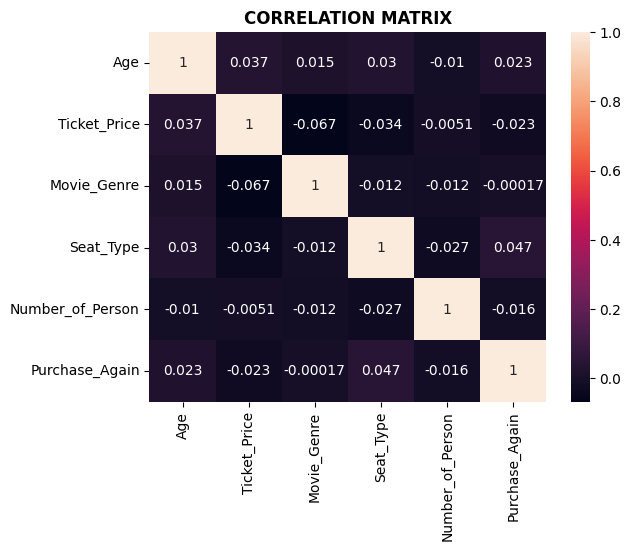

<Figure size 640x480 with 0 Axes>

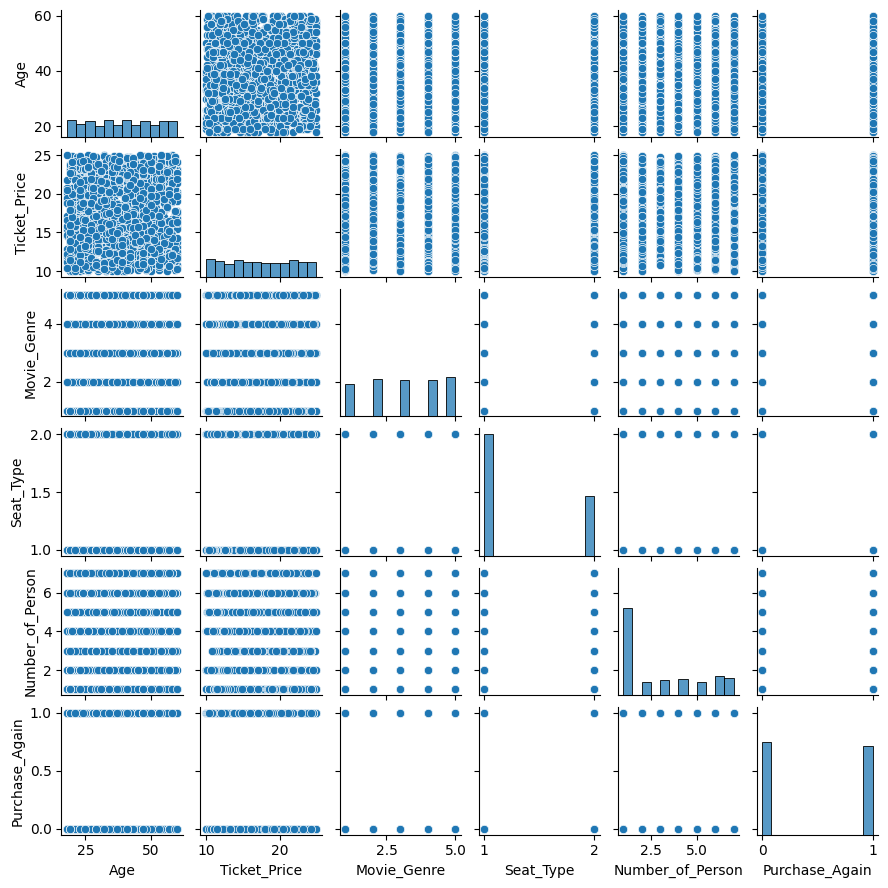

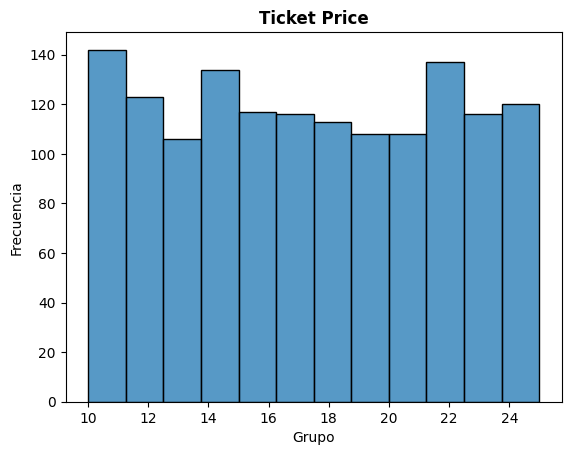


Tamaño de cada grupo: 142 123 106 134 117 116 113 108 108 137 116 120

       Ticket Group
count     12.000000
mean     120.000000
std       11.878169
min      106.000000
25%      111.750000
50%      116.500000
75%      125.750000
max      142.000000



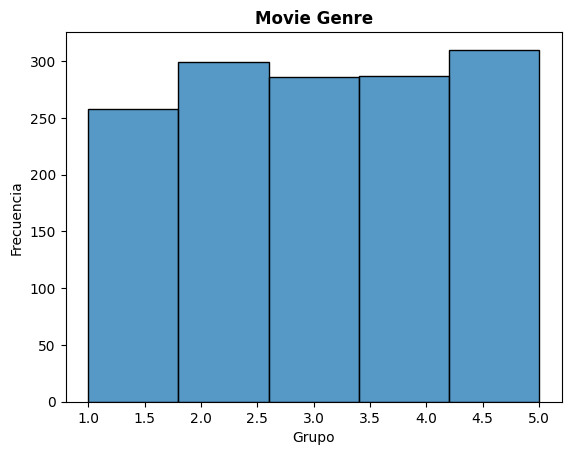


Tamaño de cada grupo: 258 299 286 287 310



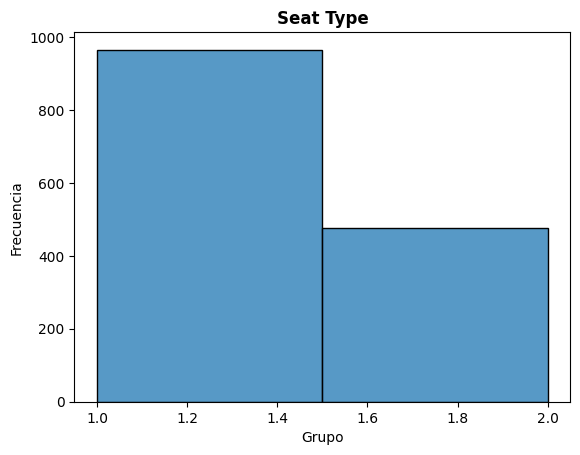

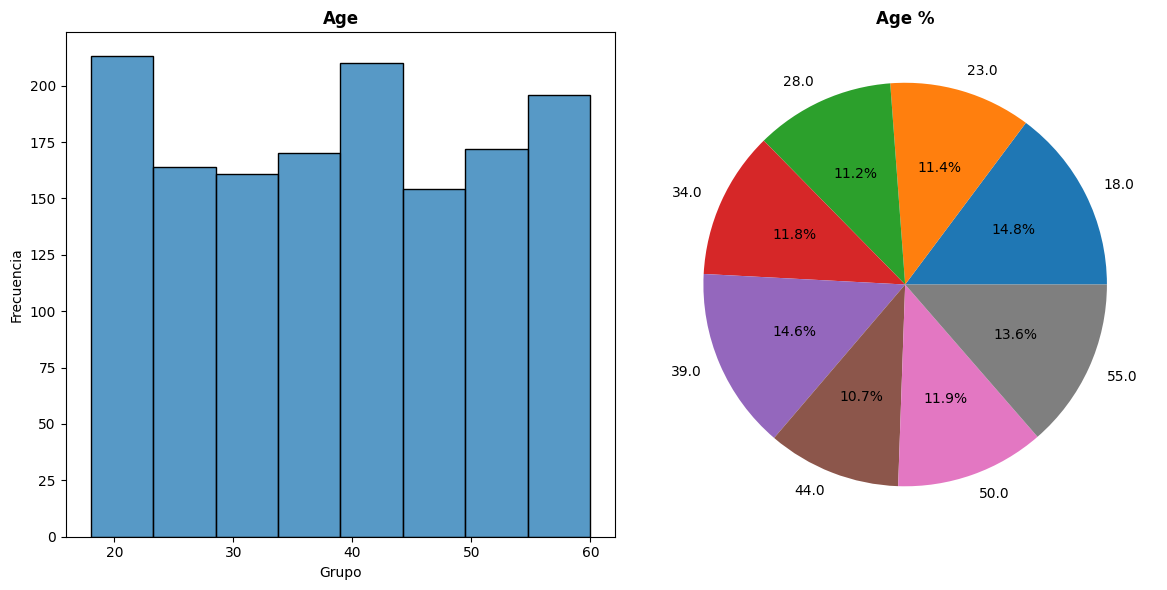

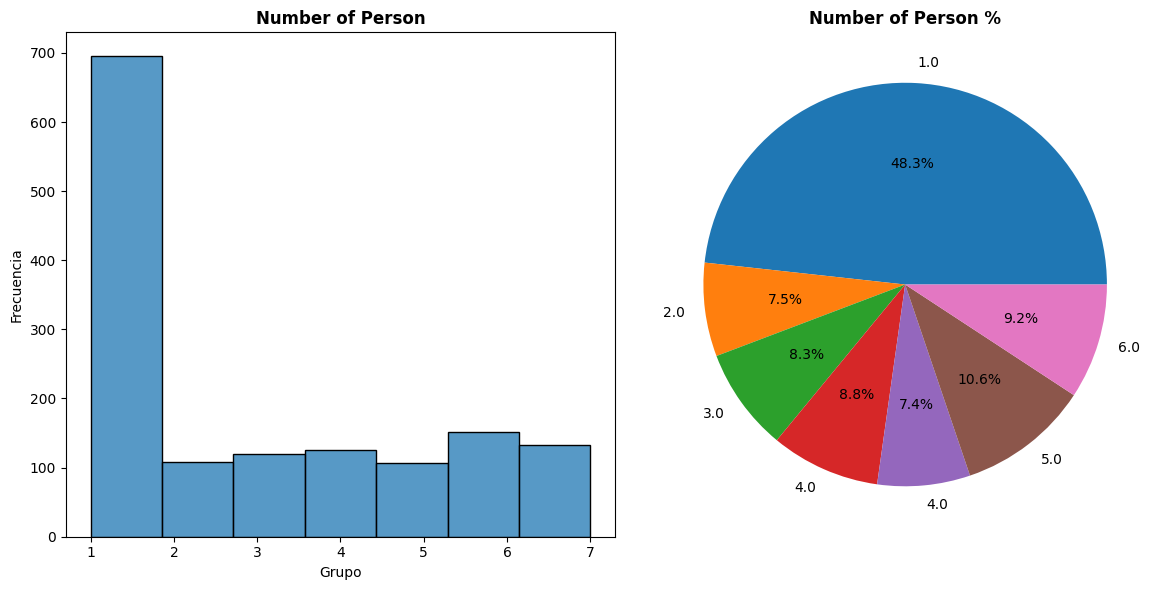



Tamaño de cada grupo: 695 108 119 126 107 152 133

       Ticket Group
count      7.000000
mean     205.714286
std      216.309743
min      107.000000
25%      113.500000
50%      126.000000
75%      142.500000
max      695.000000



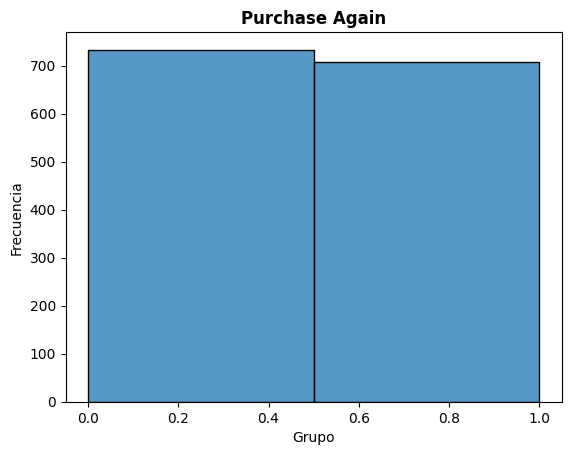


                  Purchase_Again
Number_of_Person                
1                            350
2                             51
3                             55
4                             56
5                             66
6                             61
7                             68



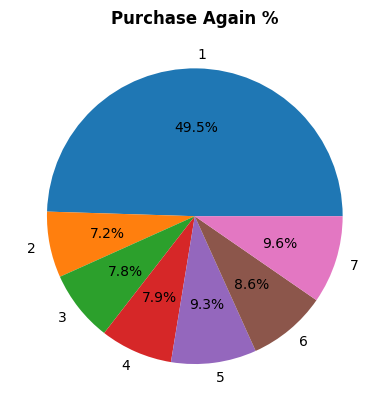


Age_Group         16-20  21-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Number_of_Person                                                           
1                    50     81     83     85     79     76     75     80   
2                    11     13      8     18     13     14     10     12   
3                     9     10     10     13      9     19      9     22   
4                     6     10     16     15     15     17     16     21   
5                     6     20     16      8      9     11     13      7   
6                     6     21     16     16     21     21     22     17   
7                    12     19     15     13     15     19     16     11   

Age_Group         56-60  
Number_of_Person         
1                    86  
2                     9  
3                    18  
4                    10  
5                    17  
6                    12  
7                    13  


In [114]:
getEDA(preprocessData)

In [56]:
def new_pre_process(dataSet):

    dataSet = dataSet[dataSet["Number_of_Person"] < 6]

    return dataSet

def new_getEDA(dataSet):
    """
    Function to get the EDA
    """

    print(dataSet.head())
    print("")
    print(dataSet.describe())
    print("")

    plt.figure()
    sns.heatmap(dataSet.drop(columns=["Ticket_ID"]).corr(), annot=True)
    plt.title('CORRELATION MATRIX', fontweight='bold')
    plt.show()
    print("")

    plt.figure()
    sns.pairplot(dataSet.drop(columns=["Ticket_ID"]), height=1.5)
    plt.show()
    print("")

  Ticket_ID  Age  Ticket_Price  Movie_Genre  Seat_Type  Number_of_Person  \
1     B8091   35         19.02            3          2                 1   
2     V6341   55         22.52            2          1                 3   
4     I3814   30         21.81            4          1                 4   
5     E5655   28         11.58            2          1                 1   
6     P1526   50         22.91            5          2                 1   

   Purchase_Again  
1               1  
2               0  
4               1  
5               1  
6               1  

               Age  Ticket_Price  Movie_Genre    Seat_Type  Number_of_Person  \
count  1155.000000   1155.000000  1155.000000  1155.000000       1155.000000   
mean     39.040693     17.357524     3.068398     1.341126          1.997403   
std      12.527996      4.378668     1.420205     0.474293          1.405915   
min      18.000000     10.010000     1.000000     1.000000          1.000000   
25%      28.000000    

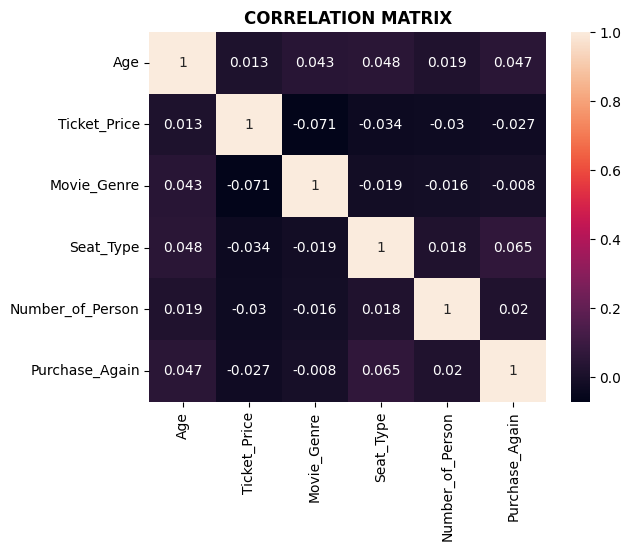

<Figure size 640x480 with 0 Axes>

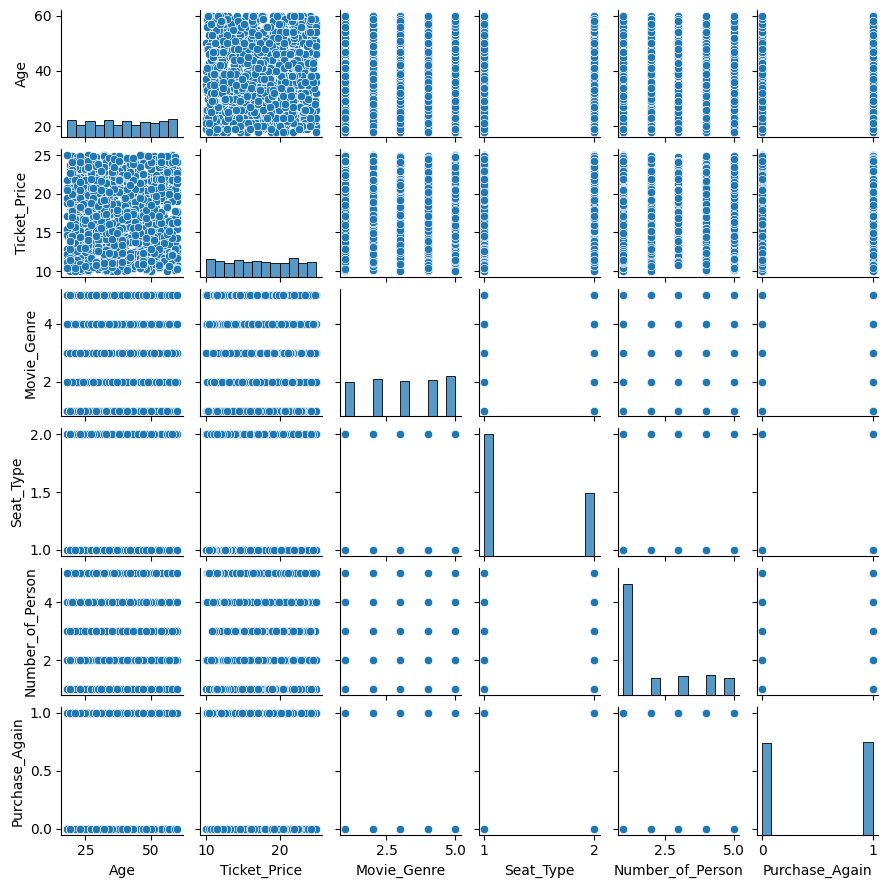

In [57]:
new_preprocessData = new_pre_process(preprocessData)
new_getEDA(new_preprocessData)